In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data Pre-Processing

In [ ]:
true = pd.read_csv("/content/drive/MyDrive/Deep Learning/Dataset/True.csv")
false = pd.read_csv("/content/drive/MyDrive/Deep Learning/Dataset/Fake.csv")
true['category'] = 1
false['category'] = 0

df = pd.concat([true,false])

In [ ]:
df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

In [ ]:
df

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


# Tokenization and Padding

In [ ]:
max_features = 5000
maxlen = 25

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df.text)

X_train,X_test,y_train,y_test = train_test_split(df.text,df.category,test_size = 0.2)

X_train_t = tokenizer.texts_to_sequences(X_train)
X_train_t = pad_sequences(X_train_t, maxlen=maxlen)

X_test_t = tokenizer.texts_to_sequences(X_test)
X_test_t = pad_sequences(X_test_t, maxlen=maxlen)

# Model

In [ ]:
batch_size = 64
max_features = 5000
maxlen = 25
model = Sequential()
model.add(Embedding(max_features, 200, input_length=maxlen))
model.add(LSTM(16,dropout=0.1,recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 200)           1000000   
                                                                 
 lstm (LSTM)                 (None, 16)                13888     
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,013,905
Trainable params: 1,013,905
Non-trainable params: 0
_________________________________________________________________


# Training with K-Fold

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
kf = KFold(n_splits=5)
scores = []
pred_mat = []
import matplotlib.pyplot as plt
from sklearn import metrics

for i,(train_index, test_index) in enumerate(kf.split(X_train_t,y_train)):

  print(f"i = {i} >>>>>> Test Index: {test_index[0]} - {test_index[-1]}")

  X_trainK, X_testK, y_trainK, y_testK = X_train_t[train_index[0]:train_index[-1]], X_train_t[test_index[0]:test_index[-1]], y_train[train_index[0]:train_index[-1]], y_train[test_index[0]:test_index[-1]]

  model.fit(X_trainK, y_trainK,epochs = 1,batch_size=batch_size)
  scores.append(model.evaluate(X_testK, y_testK)[1])

  print(scores)

i = 0 >>>>>> Test Index: 0 - 7183
225/225 [==============================] - 4s 14ms/step - loss: 0.0425 - accuracy: 0.9880
[0.9880272746086121]
i = 1 >>>>>> Test Index: 7184 - 14367
225/225 [==============================] - 2s 9ms/step - loss: 0.0090 - accuracy: 0.9979
[0.9880272746086121, 0.9979117512702942]
i = 2 >>>>>> Test Index: 14368 - 21551
225/225 [==============================] - 3s 11ms/step - loss: 0.0033 - accuracy: 0.9996
[0.9880272746086121, 0.9979117512702942, 0.9995823502540588]
i = 3 >>>>>> Test Index: 21552 - 28734
225/225 [==============================] - 2s 10ms/step - loss: 0.0050 - accuracy: 0.9983
[0.9880272746086121, 0.9979117512702942, 0.9995823502540588, 0.9983291625976562]
i = 4 >>>>>> Test Index: 28735 - 35917
225/225 [==============================] - 3s 13ms/step - loss: 0.0037 - accuracy: 0.9986
[0.9880272746086121, 0.9979117512702942, 0.9995823502540588, 0.9983291625976562, 0.9986076354980469]


In [ ]:
np.array(scores).mean()

0.9964916348457337

# Evaluate on Testing data

In [ ]:
test_score = model.evaluate(X_test_t, y_test)[1]
print(test_score)

281/281 [==============================] - 3s 11ms/step - loss: 0.0449 - accuracy: 0.9889
0.9888641238212585


281/281 [==============================] - 3s 10ms/step


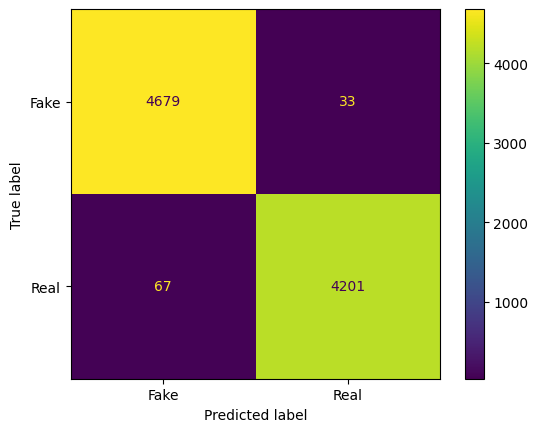

In [ ]:
pred = model.predict(X_test_t)
pred = np.rint(pred)

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fake', 'Real'])

cm_display.plot()
plt.show()

In [ ]:
confusion_matrix

array([[4679,   33],
       [  67, 4201]])

In [ ]:
pred = pred.astype(int)

In [ ]:
results_df = pd.DataFrame({"y_true": y_test, "y_pred": pred.flatten()}, index=y_test.index)

In [ ]:
# Filter the DataFrame for each category
TN = results_df[(results_df["y_true"] == 0) & (results_df["y_pred"] == 0)]
FP = results_df[(results_df["y_true"] == 0) & (results_df["y_pred"] == 1)]
FN = results_df[(results_df["y_true"] == 1) & (results_df["y_pred"] == 0)]
TP = results_df[(results_df["y_true"] == 1) & (results_df["y_pred"] == 1)]

# Extract sample indices for each category
TN_sample = TN.sample(1).index[0]
FP_sample = FP.sample(1).index[0]
FN_sample = FN.sample(1).index[0]
TP_sample = TP.sample(1).index[0]

print("TN sample:", X_test[TN_sample])
print("FP sample:", X_test[FP_sample])
print("FN sample:", X_test[FN_sample])
print("TP sample:", X_test[TP_sample])

TN sample: On September 5, 2017, the Daily Mail reported:Afghan asylum seeker accused of raping and murdering EU official s teenage daughter  attacked her to satisfy his sexual urges before leaving her unconscious in a river to drown Hussein Khavari, 22, who claims to be from Afghanistan has been accused of ambushing Maria Ladenburger, 19, as she cycled home after a party, raping her and then drowning her in Freiburg, Germany last October.He was linked through his DNA to medical student Maria, who volunteered at various shelters that house migrants in her spare time in Freiburg.Hussein claimed to be Afghani but the court heard that there is evidence he is Iraqi. And his claim to be 17 at the time of the offense was disputed by a specialist saying he was at least 22. According to Bild newspaper, during a morning session of hearings in which press and public were excluded, he claimed to be 19.He said he claimed to be 16 upon his arrival in Germany in 2015  because the situation is better

In [ ]:
with open('samples.txt', 'w') as f:
    f.write(f'TN = {X_test[TN_sample]} \n \n \n FP = {X_test[FP_sample]}\n \n \n FN ={X_test[FN_sample]} \n \n \n TP ={X_test[TP_sample]}')

In [ ]:
cm = confusion_matrix
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print('Accuracy: {:.3f}'.format(accuracy))
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print('Precision: {:.3f}'.format(precision))
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print('Recall: {:.3f}'.format(recall))
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 score: {:.3f}'.format(f1_score))

Accuracy: 0.989
Precision: 0.992
Recall: 0.984
F1 score: 0.988


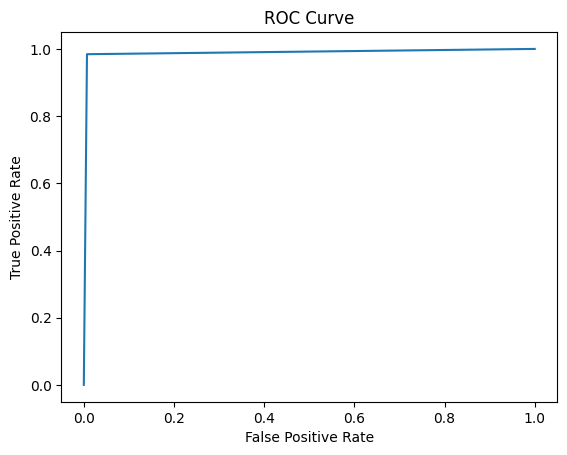

In [ ]:
from sklearn.metrics import  roc_curve,auc

fpr, tpr, _ = roc_curve(y_test, pred)

plt.plot(fpr, tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
fpr, tpr

(array([0.       , 0.0070034, 1.       ]),
 array([0.        , 0.98430178, 1.        ]))

# Testing on another Dataset

In [ ]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Deep Learning/Dataset/f_r_news.csv")

In [ ]:
test_dataset['text'] = test_dataset['text'] + " " + test_dataset['title']
del test_dataset["Unnamed: 0"]
del test_dataset["title"]

In [ ]:
test_dataset["label"] = test_dataset["label"].replace({"FAKE": 0, "REAL": 1})

In [ ]:
test_dataset.head

<bound method NDFrame.head of                                                    text  label
0     Daniel Greenfield, a Shillman Journalism Fello...      0
1     Google Pinterest Digg Linkedin Reddit Stumbleu...      0
2     U.S. Secretary of State John F. Kerry said Mon...      1
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...      0
4     It's primary day in New York and front-runners...      1
...                                                 ...    ...
6330  The State Department told the Republican Natio...      1
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...      0
6332   Anti-Trump Protesters Are Tools of the Oligar...      0
6333  ADDIS ABABA, Ethiopia —President Obama convene...      1
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...      1

[6335 rows x 2 columns]>

In [ ]:
X = test_dataset.text

In [ ]:
X_test_new = tokenizer.texts_to_sequences(test_dataset.text)
X_test_new = pad_sequences(X_test_new, maxlen=maxlen)
y_test_new = test_dataset["label"]

In [ ]:
test_score = model.evaluate(X_test_new,y_test_new )[1]
print(test_score)

198/198 [==============================] - 2s 9ms/step - loss: 2.1338 - accuracy: 0.5927
0.5927387475967407


198/198 [==============================] - 2s 9ms/step


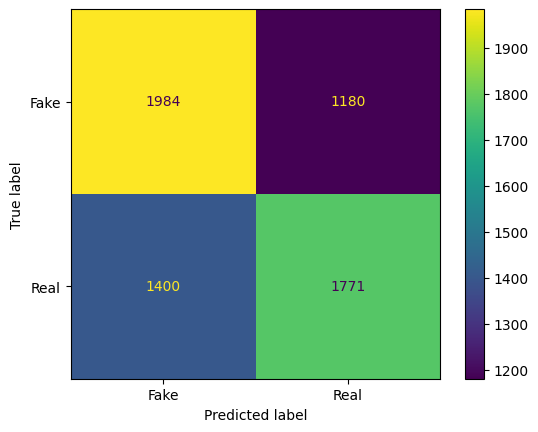

In [ ]:
pred = model.predict(X_test_new)
pred = np.rint(pred)

confusion_matrix = metrics.confusion_matrix(y_true=y_test_new, y_pred=pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Fake', 'Real'])

cm_display.plot()
plt.show()

In [ ]:
pred = pred.astype(int)
results_df = pd.DataFrame({"y_true": y_test_new, "y_pred": pred.flatten()}, index=y_test_new.index)

# Filter the DataFrame for each category
TN = results_df[(results_df["y_true"] == 0) & (results_df["y_pred"] == 0)]
FP = results_df[(results_df["y_true"] == 0) & (results_df["y_pred"] == 1)]
FN = results_df[(results_df["y_true"] == 1) & (results_df["y_pred"] == 0)]
TP = results_df[(results_df["y_true"] == 1) & (results_df["y_pred"] == 1)]

# Extract sample indices for each category
TN_sample = TN.sample(1).index[0]
FP_sample = FP.sample(1).index[0]
FN_sample = FN.sample(1).index[0]
TP_sample = TP.sample(1).index[0]

print("TN sample:", X[TN_sample])
print("FP sample:", X[FP_sample])
print("FN sample:", X[FN_sample])
print("TP sample:", X[TP_sample])

with open('samples_test_dataset.txt', 'w') as f:
    f.write(f'TN = {X[TN_sample]} \n \n \n FP = {X[FP_sample]}\n \n \n FN ={X[FN_sample]} \n \n \n\n \n \n TP ={X[TP_sample]} ')

TN sample: - < “You Ruined Your Own Communities, Don’t Ruin Ours”–Chicago Whites Demonstrate Against Black Lives Matter After Black Shot > November 8, 2016, 10:08 am A+ | a- Warning   
Commenter Muse points out that last weekend there was a cops-shoot-black-man-in-white-neighborhood story that would have been huge national news a few months ago, especially because local whites counterdemonstrated against Black Lives Matter with signs such as: 
You ruined your own communities 
Don’t ruin ours 
#BlueLivesMatter 
But this news is being sat on by the national press. Muse writes: 
Over the weekend in Chicago, an off duty fireman approached a car that was blocking the entrance to a firehouse. A dispute ensued, and two off duty policemen became involved and the African American driver was shot to death. He reportedly was brandishing a gun. Crickets from the national media. Here we have a cop shooting a black man, and all of a sudden no one except local Chicago media wants to talk about it. Wh

In [ ]:
cm = confusion_matrix
accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print('Accuracy: {:.3f}'.format(accuracy))
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print('Precision: {:.3f}'.format(precision))
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print('Recall: {:.3f}'.format(recall))
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 score: {:.3f}'.format(f1_score))

Accuracy: 0.593
Precision: 0.600
Recall: 0.558
F1 score: 0.579


In [ ]:
cm

array([[1984, 1180],
       [1400, 1771]])

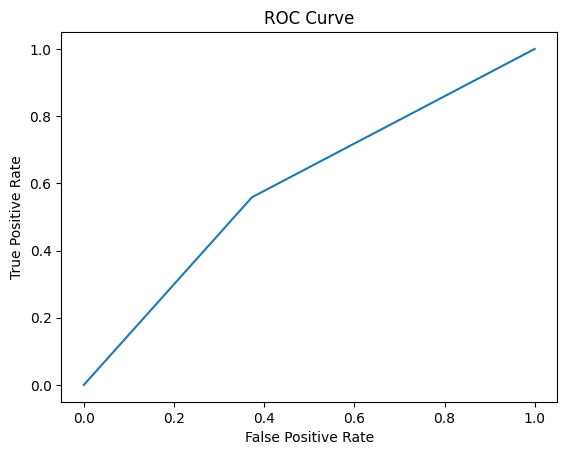

In [ ]:
from sklearn.metrics import  roc_curve,auc

fpr, tpr, _ = roc_curve(y_test_new, pred)

plt.plot(fpr, tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
print(f'Area Under the Curve - {auc(fpr, tpr)}')

Area Under the Curve - 0.5927766289074382
